**Random Forest Classification**

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [56]:
df = pd.read_csv('Customers.csv')
print(df.head())
print(df.info())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [58]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# Training the Random Forest Classification model on the training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [60]:
# Predicting a new result
new_customer = [[30, 60000]]
new_customer_scaled = sc.transform(new_customer)
prediction = classifier.predict(new_customer_scaled)

The prediction for a new customer of age 30 with an estimated salary of $60,000 is: Not Buy.

Prediction for a new customer: Not Buy

This means, according to our trained Random Forest Classification model, a customer with these characteristics is not likely to purchase the product.

In [61]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print('Prediction for a new customer (1 = will buy, 0 = will not buy):', prediction[0])

Prediction for a new customer (1 = will buy, 0 = will not buy): 0


In [62]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 4 28]]


In [63]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.91


<ipython-input-64-ca98d4bcd097>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


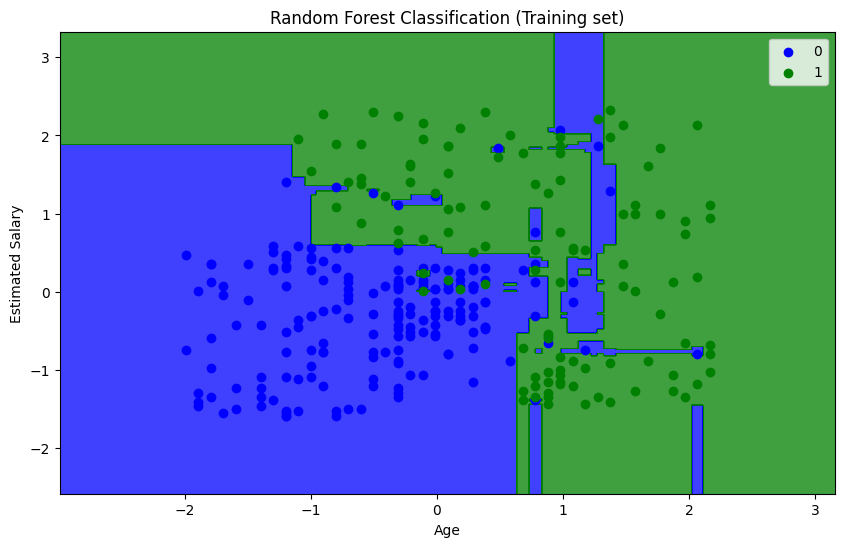

<ipython-input-64-ca98d4bcd097>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


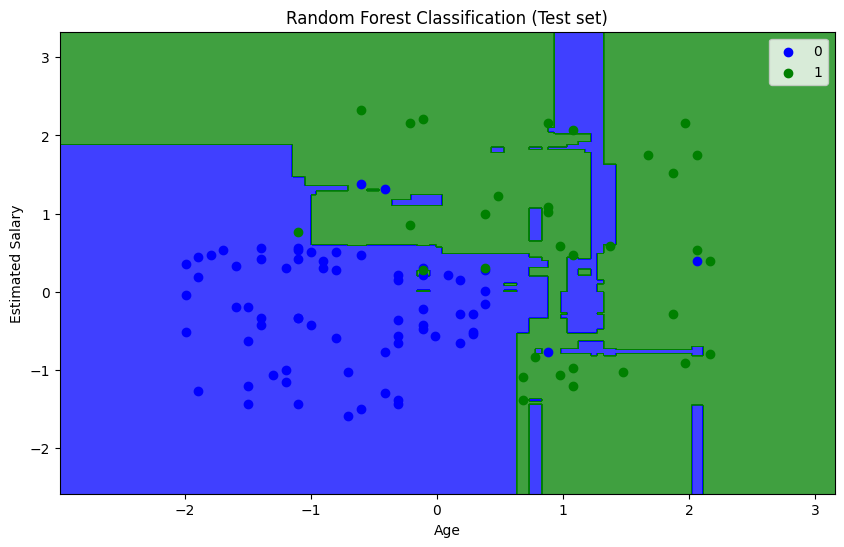

In [64]:
# Function to visualize the results
def visualize_results(X_set, y_set, set_type):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('blue', 'green'))(i), label = j)
    plt.title('Random Forest Classification ({} set)'.format(set_type))
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Visualizing the Training set results
plt.figure(figsize=(10,6), facecolor='white')
visualize_results(X_train, y_train, 'Training')

# Visualizing the Test set results
plt.figure(figsize=(10,6), facecolor='white')
visualize_results(X_test, y_test, 'Test')

In both visualizations, the blue points represent customers who did not buy the product, and the green points represent customers who bought the product. The background color indicates the prediction made by the model: blue for predicting 'Not Buy' and green for predicting 'Buy'.

These visualizations help in understanding how well the model has learned to classify the customers based on their age and estimated salary. The decision boundary, represented by the change in background color, shows the threshold at which the model's prediction changes from 'Not Buy' to 'Buy'.

The accuracy of the model on the test set was 91.00%, indicating a high level of performance in classifying new, unseen data.